#### [Chapter 11](https://github.com/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_11.ipynb)
<!-- - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ziaeemehr/mndynamics/main?labpath=mndynamics%2Fexamples%2FChap_11.ipynb) -->

**Saddle-Node Collisions**

- Börgers, C., 2017. An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.

Code by : Abolfazl Ziaeemehr ([GitHub](https://github.com/Ziaeemehr))

<a href="https://colab.research.google.com/github/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uncomment and run this line to install the package in colab
# !pip install "git+https://github.com/Ziaeemehr/mndynamics.git"

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.size'] = 16

In [3]:
a = 0.45
b = 1.0
xmin=0.2
xmax=2.0
ymin=0.1
ymax=1.0


In [4]:
def f_system(x, y, par):
    a, b = par
    dx = -a * x + y 
    dy = x**2/(1+x**2) - b* y
    return np.array([dx, dy])

# define the nullclines
def nullcline_y(x, par):
    a, b = par
    return x**2/(b*(1+x**2))
    
def nullcline_x(x, par):
    a, b = par
    return a*x


def wrapper_plot(x, y, par, ax, verbose=False):

    X, Y = np.meshgrid(x, y)
    U, V = f_system(X, Y, par)

    xnull = nullcline_x(x, par)
    ynull = nullcline_y(x, par)
    idx = np.argwhere(np.diff(np.sign(xnull-ynull))).flatten()
    ax.plot(x[idx], xnull[idx], 'ro', ms=15, alpha=0.5)
    ax.plot(x, nullcline_x(x, par), 'r', lw=3, label='nc-x')
    ax.plot(x, nullcline_y(x, par), 'b', lw=3, label='nc-y')
    ax.streamplot(X, Y, U, V, color=plt.cm.Blues(.5), density=1.)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(frameon=False, loc="upper left")

    if verbose:
        for i in idx:
            print('intersection at x = {:5.2f}, y = {:5.2f}'.format(x[i], xnull[i]))
        print("-"*50)


intersection at x =  0.62, y =  0.28
intersection at x =  1.58, y =  0.71
--------------------------------------------------
intersection at x =  0.98, y =  0.49
intersection at x =  1.00, y =  0.50
--------------------------------------------------
--------------------------------------------------


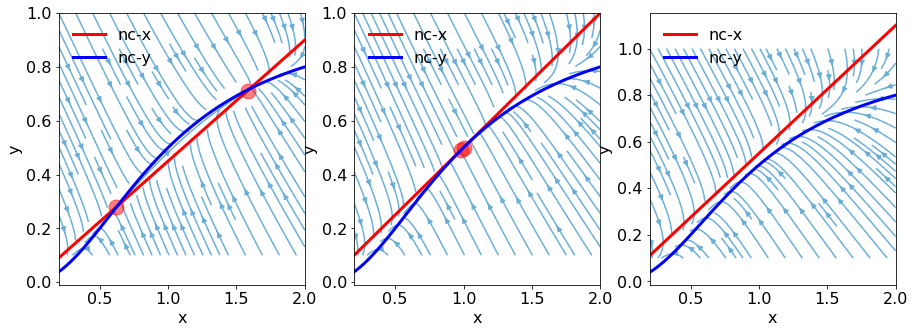

In [5]:
# define the streamplot
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

wrapper_plot(x, y, [0.45, 1], ax[0], verbose=True)
wrapper_plot(x, y, [0.5, 1] , ax[1], verbose=True)
wrapper_plot(x, y, [0.55, 1], ax[2], verbose=True)